
# Experiments with PDFA Learning

The goal of the notebook is to experiment with learning pdfa.

## Generating traces from a learning target

Here, we generate a three-state PDFA, given the following definition of a PDFA:

\textit{Probabilistic deterministic finite automaton (PDFA)}:} A PDFA is a tuple $\mathcal{A}=\left\langle Q, \Sigma, \mathbb{I}_{\mathbb{P}}, \mathbb{F}_{\mathbb{P}}, \delta_\mathbb{P}\right\rangle$ where:

\begin{itemize}
    \item $Q$ is a finite set of states; these will be labelled $q_{1}, \ldots, q_{|Q|}$ unless otherwise stated,
    \item $\Sigma$ is the alphabet,
    \item $\mathbb{I}_{\mathbb{P}}: Q \rightarrow \mathbb{Q}^{+} \cap[0,1]$ (initial-state probabilities). \textbf{For a PDFA there is a unique initial state}, i.e. $\exists q_{s} \in Q$ such that $\mathbb{I}_{\mathbb{P}}\left(q_{s}\right)=1$ and $\forall q_i \neq q_1 \in Q, \,\, \mathbb{I}_{\mathbb{P}}\left(q_{i}\right)=0$,
    \item $\mathbb{F}_{\mathbb{P}}: Q \rightarrow \mathbb{Q}^{+} \cap[0,1]$ (final-state probabilities). This can be interpreted as "the probability that you do not see any more symbols",
    \item $\delta_\mathbb{P}: Q \times \Sigma \times Q \rightarrow \mathbb{Q}^{+} \cap[0,1]$ is a transition function: the function is complete: for $a \in \Sigma$, $\delta_{\mathbb{P}}\left(q, a, q^{\prime}\right)=0$ can be interpreted as "no transition from $q$ to $q^{\prime}$ labelled with a". We will also denote $\left(q, a, q^{\prime}, P\right)$ instead of $\delta_\mathbb{P}\left(q, a, q^{\prime}\right)=P$ where $P$ is a probability. The determinism of a PDFA comes from the fact that a transition $(q, a, q' P)$ is completely defined by $q$ and $a$: 
    \begin{equation*}
    \forall q \in Q, \forall a \in \Sigma,\left|\left\{q^{\prime}: \delta_{\mathbb{P}}\left(q, a, q^{\prime}\right)>0\right\}\right| =
    \begin{cases} 
      1 & \exists \text{ a valid transition to } q' \text{under } a \\
      0 & \text{otherwise}
    \end{cases}
    \end{equation*}
\end{itemize}

$\delta_{\mathbb{P}}$ and $\mathbb{F}_{\mathbb{P}}$ are functions such that $\forall q \in Q$:

\begin{align}
\label{eqn: PDFA_final_states}
\mathbb{F}_{\mathbb{P}}(q)+\sum_{a \in \Sigma, q^{\prime} \in Q} \delta_{\mathbb{P}}\left(q, a, q^{\prime}\right)=1 \\
\therefore \mathbb{F}_{\mathbb{P}}(q) = 1 - \sum_{a \in \Sigma, q^{\prime} \in Q} \delta_{\mathbb{P}}\left(q, a, q^{\prime}\right)
\end{align}

---



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1248 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 9754 tasks      | elapsed:    2.5s
[Parallel(n_jobs=16)]: Done 10000 out of 10000 | elapsed:    2.6s finished


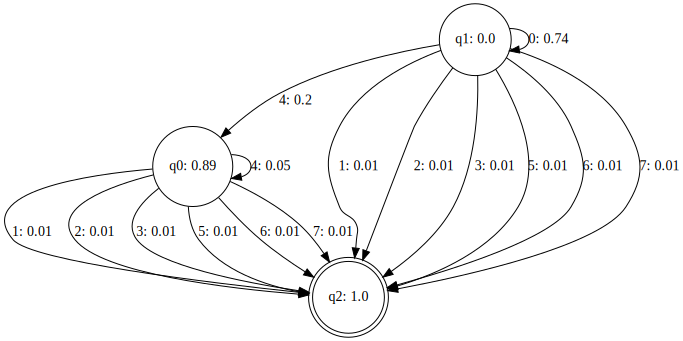

q0 q0 {'symbol': 4, 'probability': 0.05, 'label': '4: 0.05'}
q0 q2 {'symbol': 1, 'probability': 0.01, 'label': '1: 0.01'}
q0 q2 {'symbol': 2, 'probability': 0.01, 'label': '2: 0.01'}
q0 q2 {'symbol': 3, 'probability': 0.01, 'label': '3: 0.01'}
q0 q2 {'symbol': 5, 'probability': 0.01, 'label': '5: 0.01'}
q0 q2 {'symbol': 6, 'probability': 0.01, 'label': '6: 0.01'}
q0 q2 {'symbol': 7, 'probability': 0.01, 'label': '7: 0.01'}
q1 q1 {'symbol': 0, 'probability': 0.74, 'label': '0: 0.74'}
q1 q0 {'symbol': 4, 'probability': 0.2, 'label': '4: 0.2'}
q1 q2 {'symbol': 1, 'probability': 0.01, 'label': '1: 0.01'}
q1 q2 {'symbol': 2, 'probability': 0.01, 'label': '2: 0.01'}
q1 q2 {'symbol': 3, 'probability': 0.01, 'label': '3: 0.01'}
q1 q2 {'symbol': 5, 'probability': 0.01, 'label': '5: 0.01'}
q1 q2 {'symbol': 6, 'probability': 0.01, 'label': '6: 0.01'}
q1 q2 {'symbol': 7, 'probability': 0.01, 'label': '7: 0.01'}


In [154]:
%load_ext autoreload
%autoreload 2
from wombats import pdfa
from sklearn.model_selection import train_test_split

model = pdfa.PDFA(graphDataFile='config/pdfa_self_driving_config.yaml')

numSamples = 1e4
maxTraceLength = 30
traces, traceLengths = model.generateTraces(numSamples, N=maxTraceLength)

test_size = 0.1
(traces_train, traces_test,
 traceLengths_train, traceLengths_test) = train_test_split(traces,
                                                           traceLengths,
                                                           test_size=test_size)
numTraces_train = len(traces_train)
numTraces_test = len(traces_test)

model.writeTracesToFile(traces_train, numTraces_train,
                        traceLengths_train,
                        fName='PDFASamples_train.swag')
model.writeTracesToFile(traces_test, numTraces_test,
                        traceLengths_test,
                        fName='PDFASamples_test.swag')

model.drawIPython()
model.dispEdges()

In [148]:
%autoreload 2

learned_model = pdfa.PDFA(graphDataFile='dfafinal.dot')

ValueError: ('graphDataFile (%s) is not a .yaml or .dot file with the proper graphDataFileFormat (dfafinal.dot)', 'native')

# Flexfringe Usage

Two choices: Using it via Python function calls, or working with the command line.

## Step 1

Install all dependencies and compile flexfringe (development branch due to some technicalities using WIFEXITED macro used for the SAT solver's process)

In [ ]:
# for the C++ code
!apt install graphviz
!apt install libgsl-dev
!apt install libpopt-dev

# for visualization and notebook interface
!pip install graphviz

# Stamina data
!wget http://stamina.chefbe.net/downloads/grid.tar.gz
!tar xfz grid.tar.gz

# cloning the repository
!rm -rf dfasat
!git clone https://bitbucket.org/chrshmmmr/dfasat.git

In [ ]:
# building the repository
# it is important to check out the development branch on colab
!cd dfasat && git checkout  && make clean all

## Step 2 
Provide simple command line wrappers

In [3]:
import subprocess
import sys
import graphviz

from IPython.display import Image, display

def flexfringe(*args, **kwargs):

    command = ["--help"]

    if(len(kwargs) > 1):
        command = []
    for key in kwargs:
        command += ["-" + key + "=" + kwargs[key]]

    flexfringeCall = ["dfasat/flexfringe",] + command + [args[0]]
    callString = subprocess.run(flexfringeCall, 
                                stdout=subprocess.PIPE).stdout.decode()
    print("%s" % callString)

    try:
        with open("dfafinal.dot") as fh:
            return fh.read()
    except FileNotFoundError:
        print("No output file was generated.")

    return None
    
def show(data):
    if data=="":
        pass
    else:
        g = graphviz.Source(data, format="png")
        g.render()
        display(Image(g.render()))

In [ ]:
!ls dfasat/data/staminadata

## Step 3

call the flexfringe function with the filename and named arguments just as described in help. Mind that "heuristic-name" is actually an expression, not a valid name. Use the short form in this case.

The flexringe() call returns a string with the dot output.

In [62]:
!dfasat/flexfringe --help

welcome, running git commit bea192cc5abfd8bd4e1121472f875eea2ea6da69 with: dfasat/flexfringe --help 
Usage: flexfringe [OPTIONS]* [input dfa file]
      --version                   Display version information
  -V, --debug=integer             Debug mode and verbosity evel
  -o, --output-dir=string         Relative path for output files with trailing
                                  /, default: "./".
  -h, --heuristic-name=string     Name of the merge heurstic to use; default
                                  count_driven. Use any heuristic in the
                                  evaluation directory. It is often beneficial
                                  to write your own, as heuristics are very
                                  application specific.
  -d, --data-name=string          Name of the merge data class to use; default
                                  count_data. Use any heuristic in the
                                  evaluation directory.
  -M, --mode=string          

In [143]:
data = flexfringe("PDFASamples_train.swag",
                  h="kldistance",
                  d="kl_data")

welcome, running git commit 01a3635e18b660c402af68262fde207226d764ae with: dfasat/flexfringe -h=kldistance -d=kl_data PDFASamples_train.swag 
sat_program : 
valid: kldistance
aic 1
alergia 1
alergia94 1
conflict_driven 1
conflict_edsm_driven 1
conflict_overlap_driven 1
count_driven 1
depth_driven 1
evidence_driven 1
fixed_depth_mse_error 1
full_overlap_driven 1
kldistance 1
likelihoodratio 1
mealy 1
mse_error 1
overlap4logs 1
overlap_driven 1
process_mining 1
Using heuristic kldistance
Creating apta using evaluation class kl_data
batch mode selected
reading data finished, processing:
dfasat running x14810  x1634  x85  x78  x75  x72  x72  x67  x67  x23  x16  x14  x13  x13  x13  m100000  x4059  x1120  x68  x58  x57  x56  x50  x49  m100000  x1071  x320  x28  x17  x16  x16  x15  x15  x13  x6  x6  x5  x5  x4  x3  m100000  x65  x15  x3  x2  x2  x2  x2  x1  x1  x1  m100000  x1  x1  

found intermediate solution with 116 and 51 red states
No valid solver specified, skipping...



## Step 4
Visualize the output by feeding the dot string to the show() function.

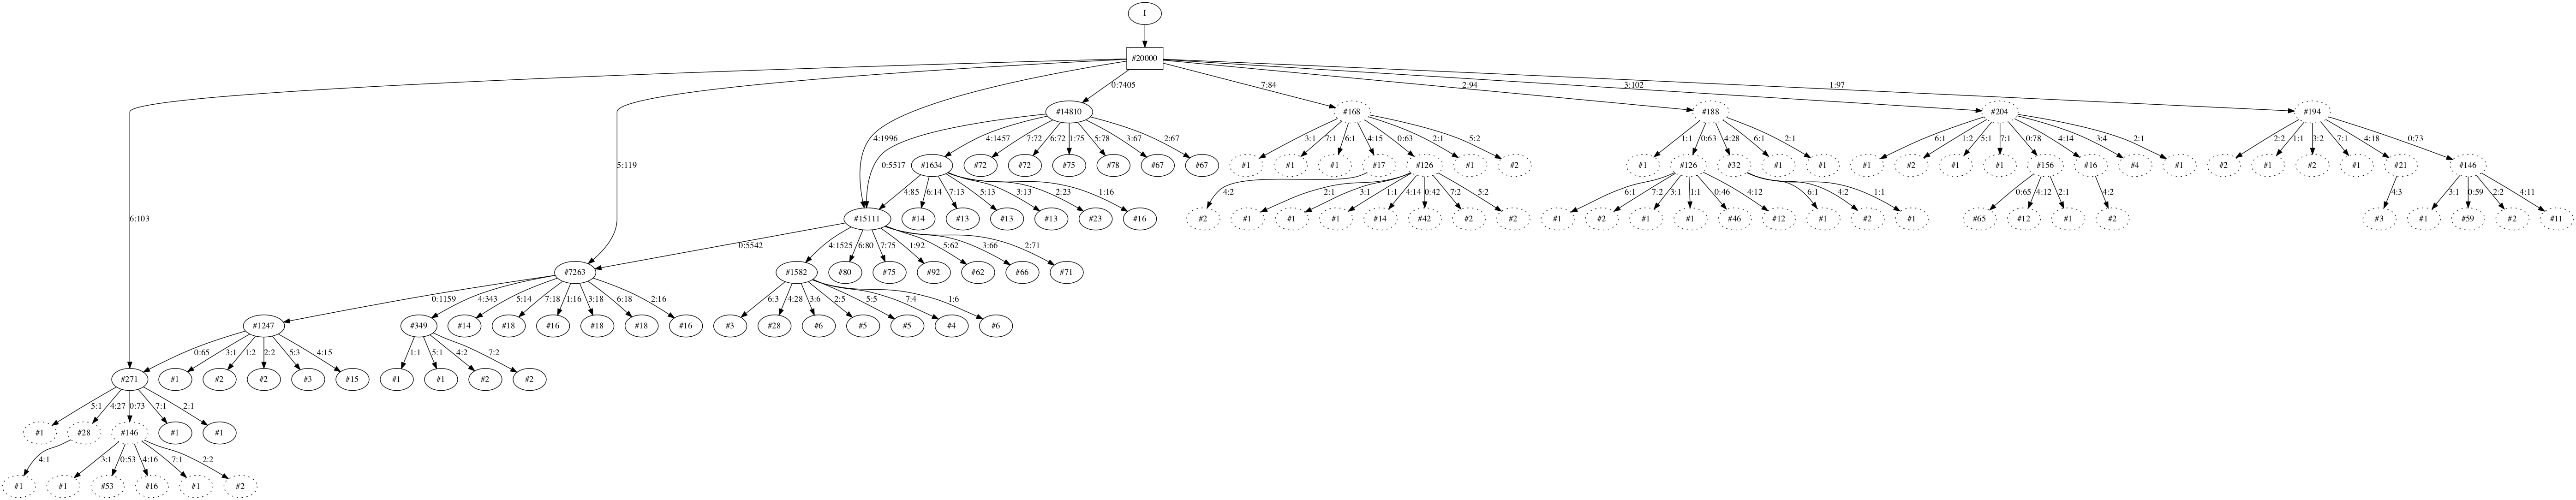

In [144]:
show(data)

## Step 5

Compare with a direct command line. Each cell can act as a shell by prepending a bang ! to the commands.

In [61]:
# !dfasat/flexfringe -h=overlap_driven -d=overlap_data /content/grid/1_training.txt 
!dfasat/flexfringe --help

welcome, running git commit bea192cc5abfd8bd4e1121472f875eea2ea6da69 with: dfasat/flexfringe --help 
Usage: flexfringe [OPTIONS]* [input dfa file]
      --version                   Display version information
  -V, --debug=integer             Debug mode and verbosity evel
  -o, --output-dir=string         Relative path for output files with trailing
                                  /, default: "./".
  -h, --heuristic-name=string     Name of the merge heurstic to use; default
                                  count_driven. Use any heuristic in the
                                  evaluation directory. It is often beneficial
                                  to write your own, as heuristics are very
                                  application specific.
  -d, --data-name=string          Name of the merge data class to use; default
                                  count_data. Use any heuristic in the
                                  evaluation directory.
  -M, --mode=string          

In [87]:
!dot -Tpng dfafinal.dot > outfile.png

## Step 6

Visualize the files using inline Python calls, e.g. display and Image

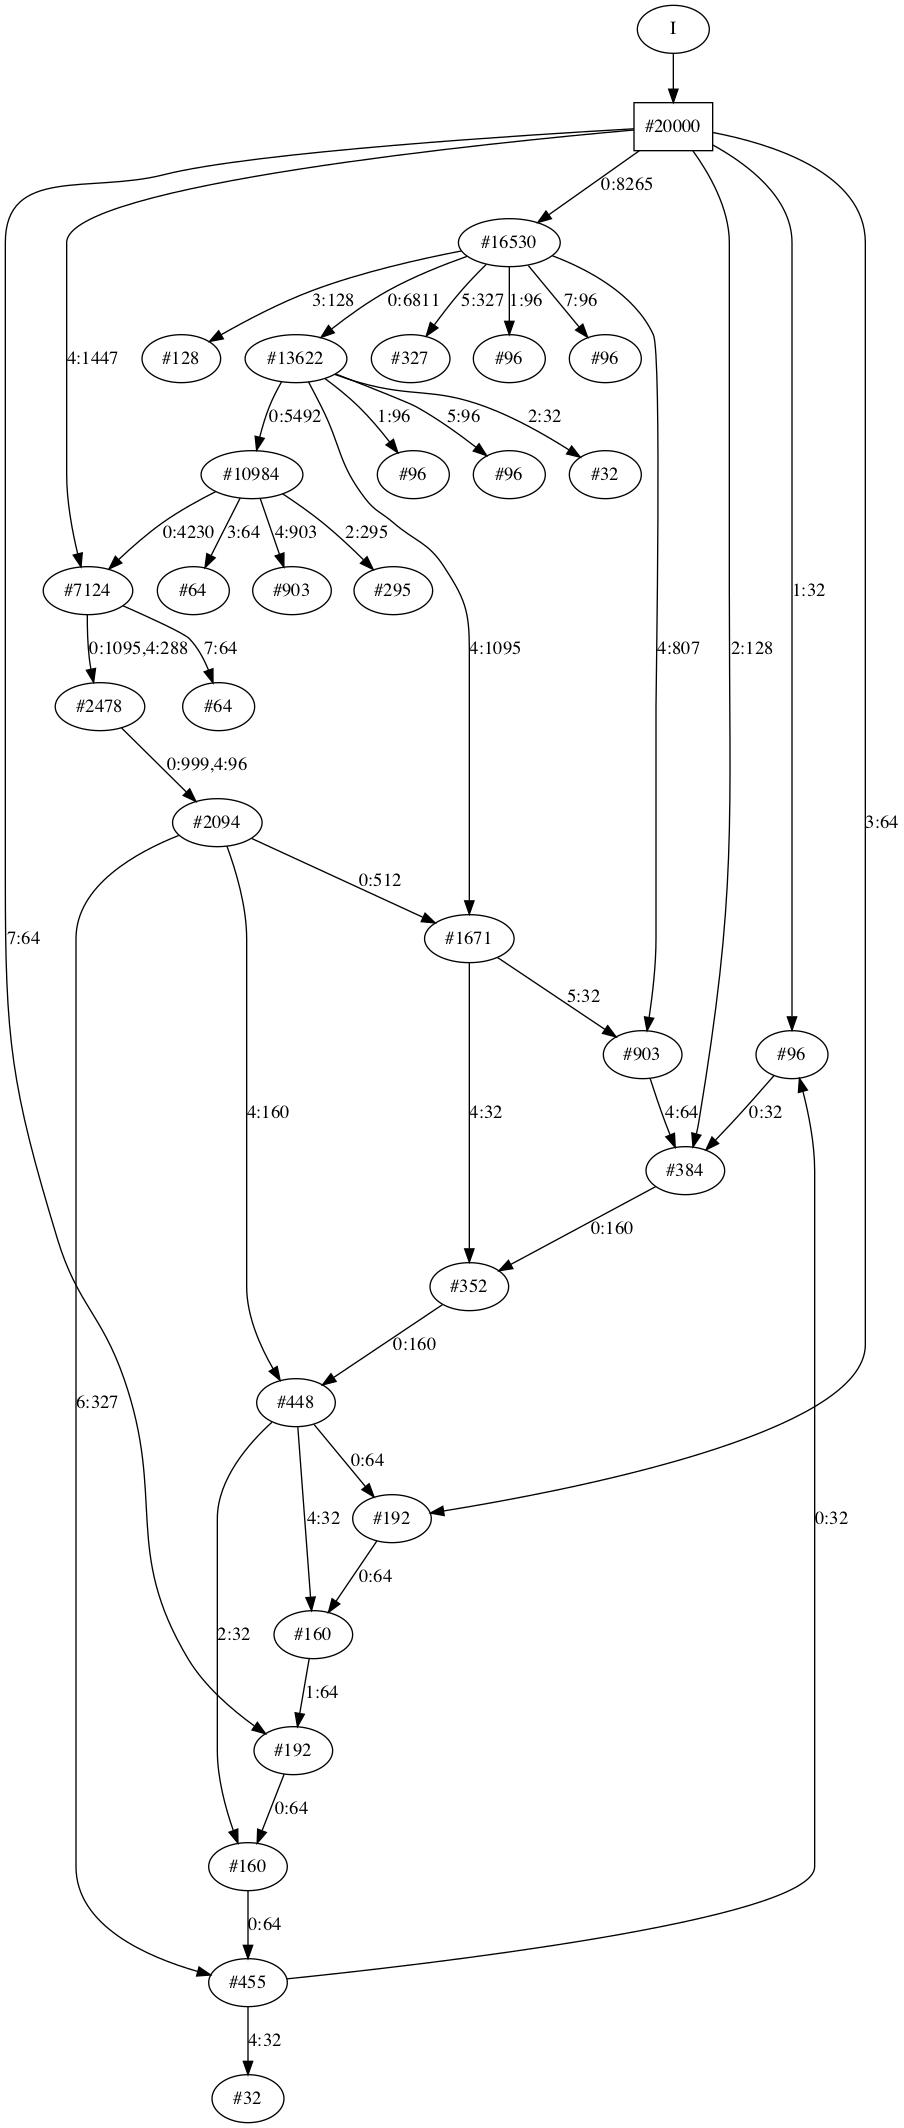

In [88]:
display(Image("outfile.png"))